# Surprise House Price Predicition Regression Project

Surprise Housing, a US-based real estate company, has made the decision to join the Australian market. The company buys houses below market value and resells them for a greater price by using data analytics. The company has gathered a data set from Australian home sales for the same reason.

The business is considering potential properties to purchase in order to enter the market. To determine whether to invest in the potential properties and to anticipate their real value, you must create a regression model using regularisation.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [2]:
# Loading dataset
warnings.filterwarnings('ignore')

house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### There are total of 1460 rows and 81 columns

In [4]:
# Numerical Analysis
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Printing the numerical and categorical values
numeric_house = house.select_dtypes(include=['int64','float64'])
categorical_house = house.select_dtypes(include=["int64","float64"])

# Numerical columns
print("Numerical Columns : ", numeric_house.columns)

# Categorical columns
print("Categorical Columns :", categorical_house.columns)

Numerical Columns :  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Columns : Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsA

## Checking for Outliers

In [7]:
outliers_percentage={}

for feature in numeric_house:
    IQR=numeric_house[feature].quantile(.75)-numeric_house[feature].quantile(.25)
    outliers_count=numeric_house[(numeric_house[feature]>(numeric_house[feature].quantile(.75)+1.5*IQR)) | (numeric_house[feature]<(numeric_house[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_house.shape[0]*100,2)
    
outliers_df = pd.DataFrame({"Features":list(outliers_percentage.keys()),"Percentage":list(outliers_percentage.values())})
outliers_df.sort_values(by="Percentage",ascending=False)


,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**Observations** 
- Most of the numerical data has outliers
- Dropping columns with numerical columns outliers will lose data
- so assigining fixed minimum values to these rows where feature value is outside the range of **[25th Percentilie - 1.5 IOR, 75th percentilie + 1.5 IQR]**


In [8]:
for feature,percentage in outliers_percentage.items():
    if feature!= 'SalePrice': # excluding target variable
        IQR = house[feature].quantile(.75) - house[feature].quantile(.25)
        max_value = house[feature].quantile(.75)+1.5*IQR
        min_value = house[feature].quantile(.25) - 1.5*IQR
        house[feature][house[feature] > max_value] = max_value
        house[feature][house[feature] < min_value] = min_value

In [9]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


**Histogram of Numerical Data**

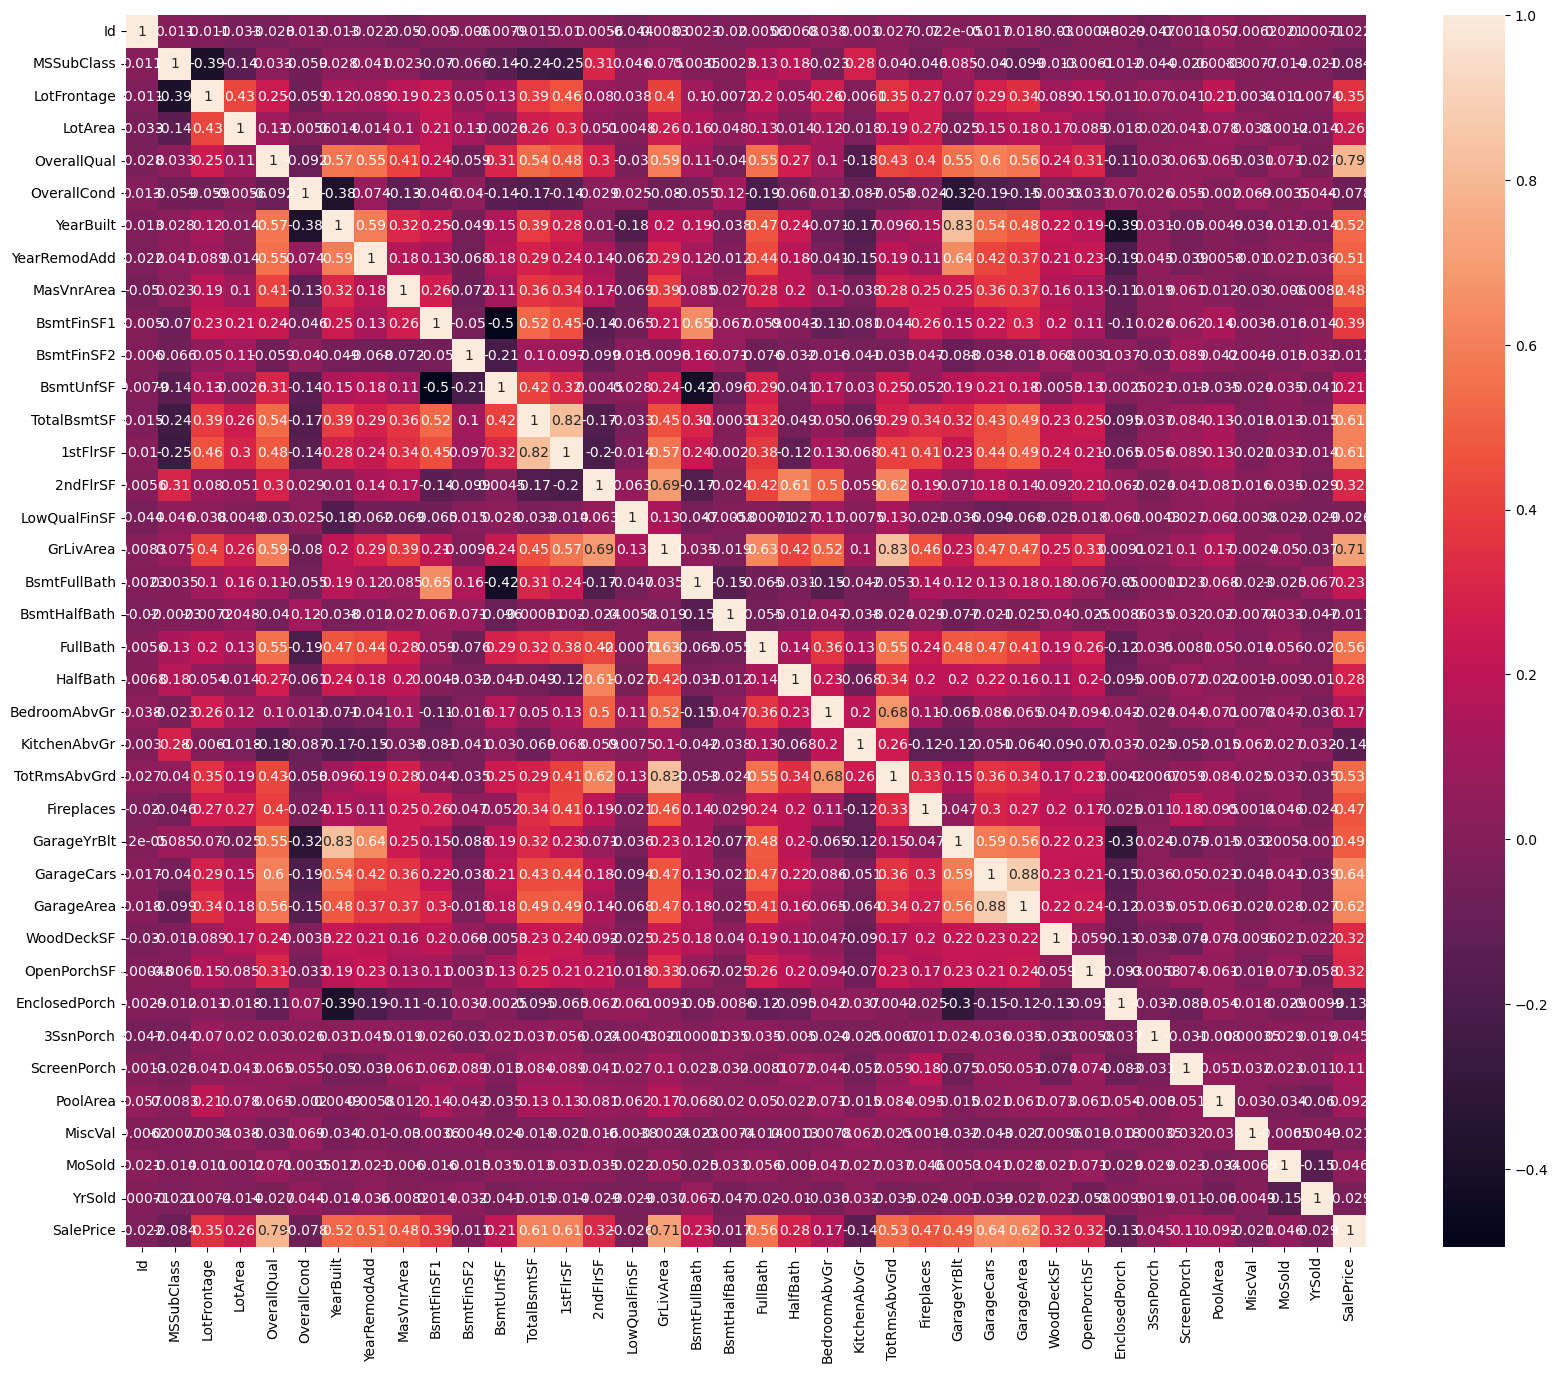

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_house.corr(), annot=True)
plt.show()

**Comments**
- Below features have collinearity
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBlt (0.83)
- TotalRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after visualization.

**Univariate and Bivariate Analysis - Numerical Feature**


**Analyzing Numerical Features with Continuous Values**


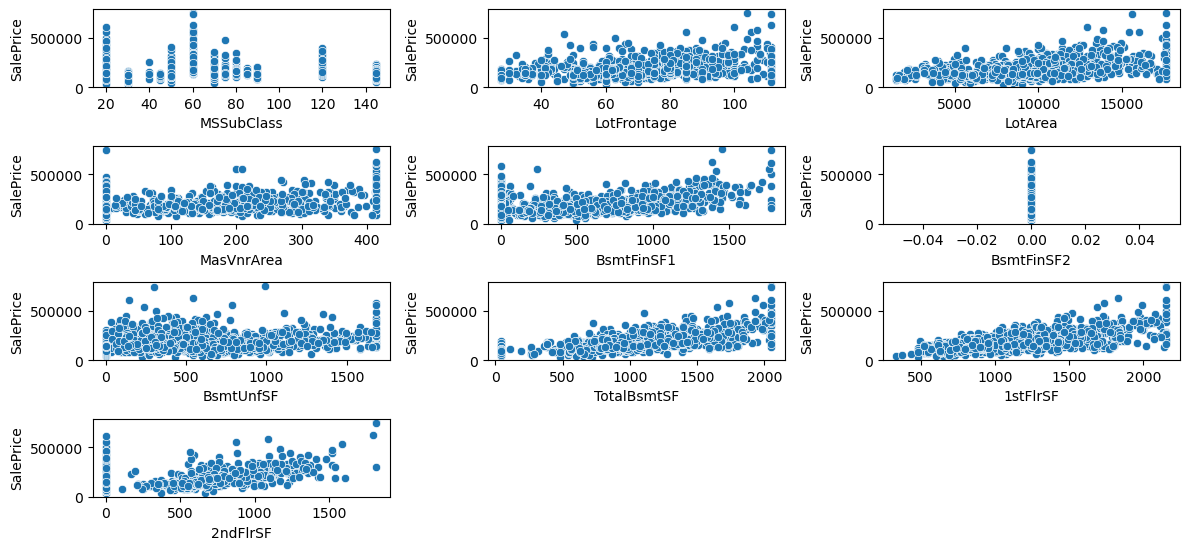

In [16]:
fig=plt.subplots(figsize=(12,12))
for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(x=house[feature], y=house['SalePrice'])
    plt.tight_layout()

**Observations**
- **LotFrontage**,**LotArea**,**TotalBsmtSF**,**1stFlrSF**,**2ndFlrSF** are showing the postive correlation with SalePrice.
- **MSSubClass** his discrete values
- **BsmtFinSF2** has single value and can be dropped.

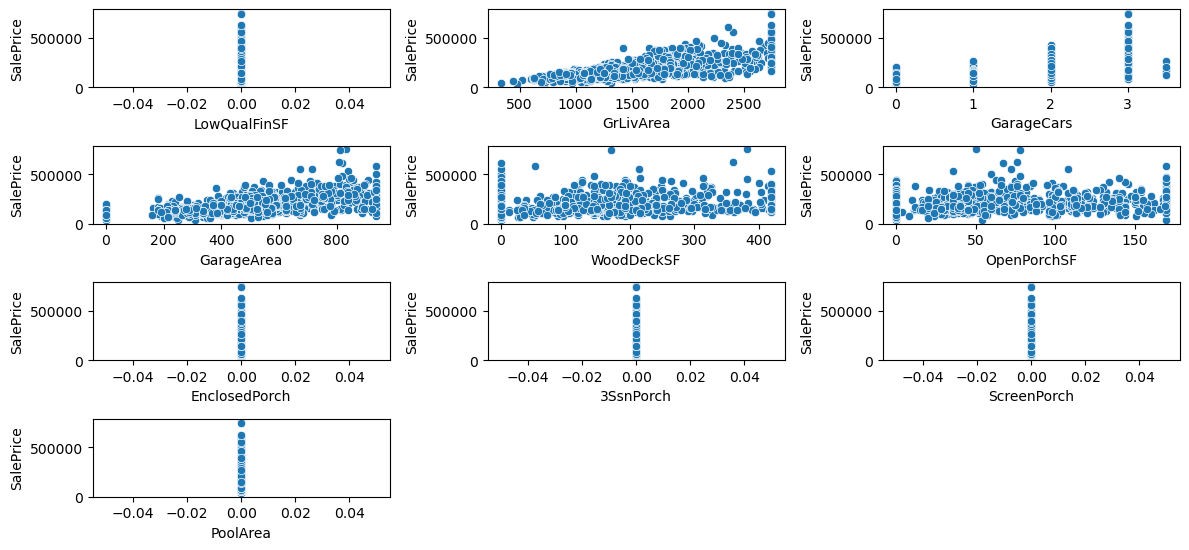

In [17]:
fig=plt.subplots(figsize=(12,12))
for i, feature in enumerate (['LowQualFinSF','GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']):
 plt.subplot(9,3,i+1)
 plt.subplots_adjust(hspace=2.0)
 sns.scatterplot(x=house[feature], y=house['SalePrice'])
 plt.tight_layout()

**Observations**
- **'GrLivArea','GarageArea'**,showing postive correlation with SalePirce.
- **'LowQualFinSF','EnclosedPorch,'3SsnPorch','ScreenPorch','PoolArea','Miscvar'** feature have single values and can be dropped

**Visualizing the distribution of the numerical features**

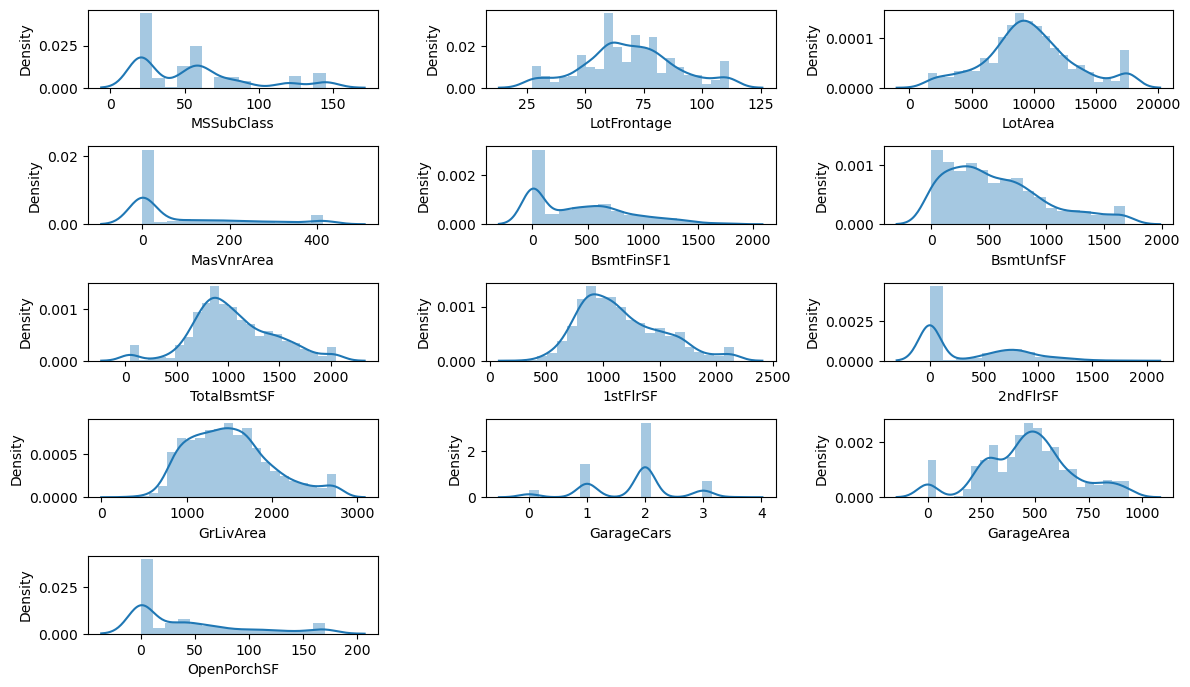

In [18]:
fig=plt.subplots(figsize=(12,12))    
for i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageCars','GarageArea','OpenPorchSF']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.distplot(house[feature])
    plt.tight_layout()

In [19]:
house[['LowQualFinSF','GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


**Removing features 'GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF'as they have fixed values**

In [20]:
house[['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Dropping columns as they have same values zero and wouldn't contribute to the model
house.drop(['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1, inplace=True)

# checking the remaing Columns
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

**Analyzing Numerical Values**

In [22]:
house[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950.0,1950,1996


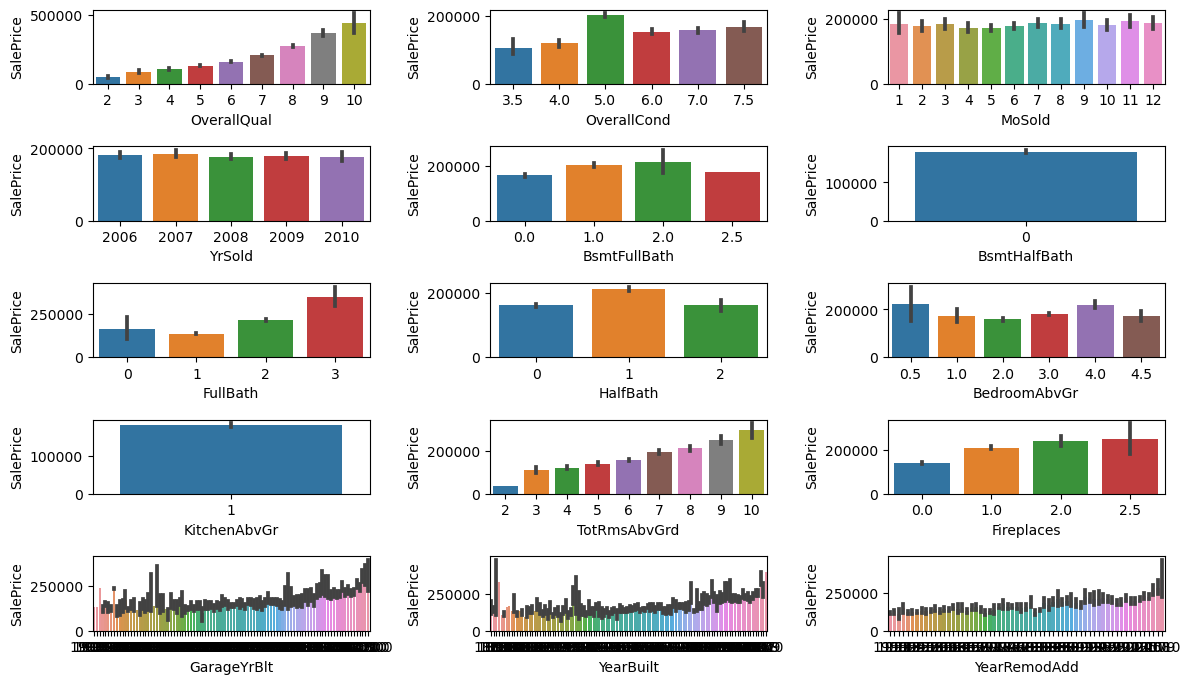

In [23]:
fig=plt.subplots(figsize=(12,12))    
for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.barplot(x=house[feature], y=house['SalePrice'])
    plt.tight_layout()

**Observations**
- 'OverallQual': More the rating of the features more the SalePrice (target Variable)
- 'OverallCond' : SalePrice is highest for rating 5.
- 'MoSold' and 'YrSold' : SalePrice  does not show strong trend depending on month and year which realty is sold.
- 'FullBath' : 3rd and "HalfBath": 1 is highest SalePrice.
- 'TotRmsAbvGrd': More the number of total rooms grade more the SalePrice.
- 'GarageYrBlt','YearBuilt','YearRemodAdd','YrSold': Will extract new features from to identify any trend.
- 'BstmFullBath','KitchenAbvGr': Need Further inspection for meaningful insight.

In [24]:
house[['BsmtFullBath','KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753
std,0.517373,0.0,24.689725,30.108397,20.645407
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [25]:
print(house['BsmtFullBath'].value_counts())
print(house['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [26]:
# dropping column 'KitchenAbvGr'
house.drop(['KitchenAbvGr'],axis=1, inplace=True)

In [27]:
house[['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [28]:
# Converting the year related features into numbers of years.
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']:
    house[feature] = 2021 - house[feature]

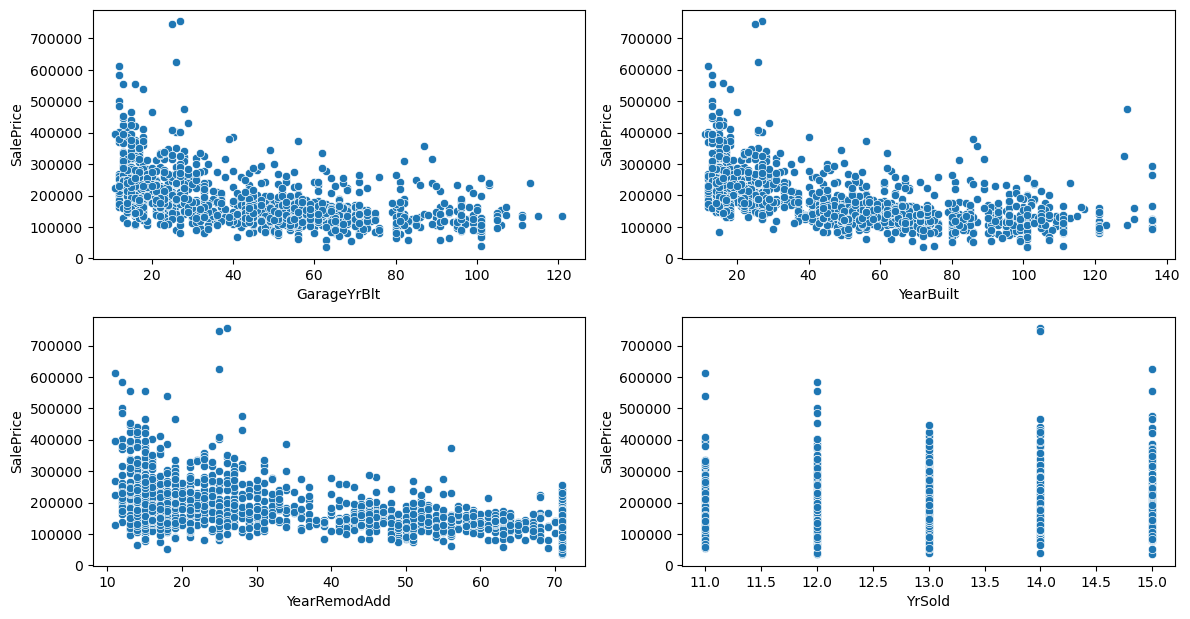

In [29]:
fig=plt.subplots(figsize=(12,12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.scatterplot(x=house[feature], y=house['SalePrice'])
    plt.tight_layout()

**Observations**
- A garage is often constructed within 20 years of a real estate property. Newer garages are on sale at a higher price.
- Sale Price exceeds lower value of Year Built; that is, more recent construction homes.
- Homes with recent remodels (lower YearRomdAdd values) have higher SalePrices.
- YrSold continues to show no  trend.

## Missing values Handling - Numerical data

In [31]:
for feature in house.select_dtypes(exclude=['object']).columns:
    if house[feature].isnull().any():
        print(feature," : ", round(house[feature].isnull().sum()/house.shape[0],2)*100)

LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [32]:
# Since MasVnrArea has only 1% data missing, droping the row with Null Values in MasVnrArea  
# Dropping the ID columns as it doesnot contribute towards predicting SalePrice.

house = house[~house['MasVnrArea'].isnull()]
house.drop(['Id'],axis=1, inplace=True)
numeric_house.drop(['Id'],axis=1, inplace=True)

In [33]:
house.columns.shape

(73,)

**Dropping columns are the below are highly correlated**
- GarageCars and GarageArea (Correlation Coefficient = 0.88) dropping GarageCars
- GarageYrBlt and YearBlt (Correlation Coefficient = 0.83) dropping GarageYrBlt for high correlation and containing missing value.
- TotalRmsAbvGrd and GrLivArea (Correlation Coefficient = 0.83) dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation Coefficient = 0.82) dropping TotalBsmtSF
- Missing Value Imputation to be done for house["LotFrontage"] after spilitting data into train and test set to avoid data leakage.

In [34]:
house.drop(['GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(house.columns.shape)

(69,)


## Analyzing Categorical Features

In [35]:
# Categorical Feature in the DataFrames

categorical_house.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Missing value Handling - Categorical data

In [36]:
for feature in house.select_dtypes(include=['object']).columns:
    if house[feature].isnull().any():
        print(feature, ':' , round(house[feature].isnull().sum()/house[feature].shape[0],2)*100)

Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [37]:
house['Electrical'].isnull().sum()

1

In [38]:
house['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

**Comments:**

- For 'Alley' Nan Means 'No access to alley.
- For 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' Nan_means "No Bassement"
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means "No Garage"
- Fpr FriplaceQu and Fence Nan means 'No Fire' Place and 'No Fence'
- MiscFeature - Nan means no additional features mentioned.

All these feature will be imputed with meaningful values in place of missing data. 

In [39]:
mv_categorical_feat = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu','Fence','MiscFeature']
print(house[mv_categorical_feat].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [40]:
# Imputing Missing Values with "Not_applicable"
house[mv_categorical_feat]= house[mv_categorical_feat].fillna(value="Not_applicable",axis=1)

# Check after imputation
print(house[mv_categorical_feat].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [41]:
# Dropping the "PoolQC" for very high percentage of data imbalance
house.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in Electrical for very low missing value count.
house.dropna(subset=["Electrical"],inplace=True)

In [42]:
# Checking percentage
for feature in house.columns:
    print(feature, ':', round(house[feature].isnull().sum()/house[feature].shape[0], 2)*100)

MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 18.0
LotArea : 0.0
Street : 0.0
Alley : 0.0
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.0
MasVnrArea : 0.0
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.0
BsmtCond : 0.0
BsmtExposure : 0.0
BsmtFinType1 : 0.0
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.0
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0
1stFlrSF : 0.0
2ndFlrSF : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.0
GarageType : 0.0
GarageFinish : 0.0
GarageArea : 0.0
GarageQual : 0.0
GarageCond : 0.0
PavedDrive : 0.0
WoodDeckSF :

In [43]:
house.columns.shape

(68,)

In [48]:
# Box plot 
def boxplot(feature_list):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
    plt.subplots_adjust(hspace=0.5)

    for i, feature in enumerate(feature_list):
        sns.boxplot(x=house[feature], y=house['SalePrice'], ax=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_title(f'Boxplot for {feature}')

    # Remove any extra empty subplots
    for j in range(len(feature_list), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

    plt.show()

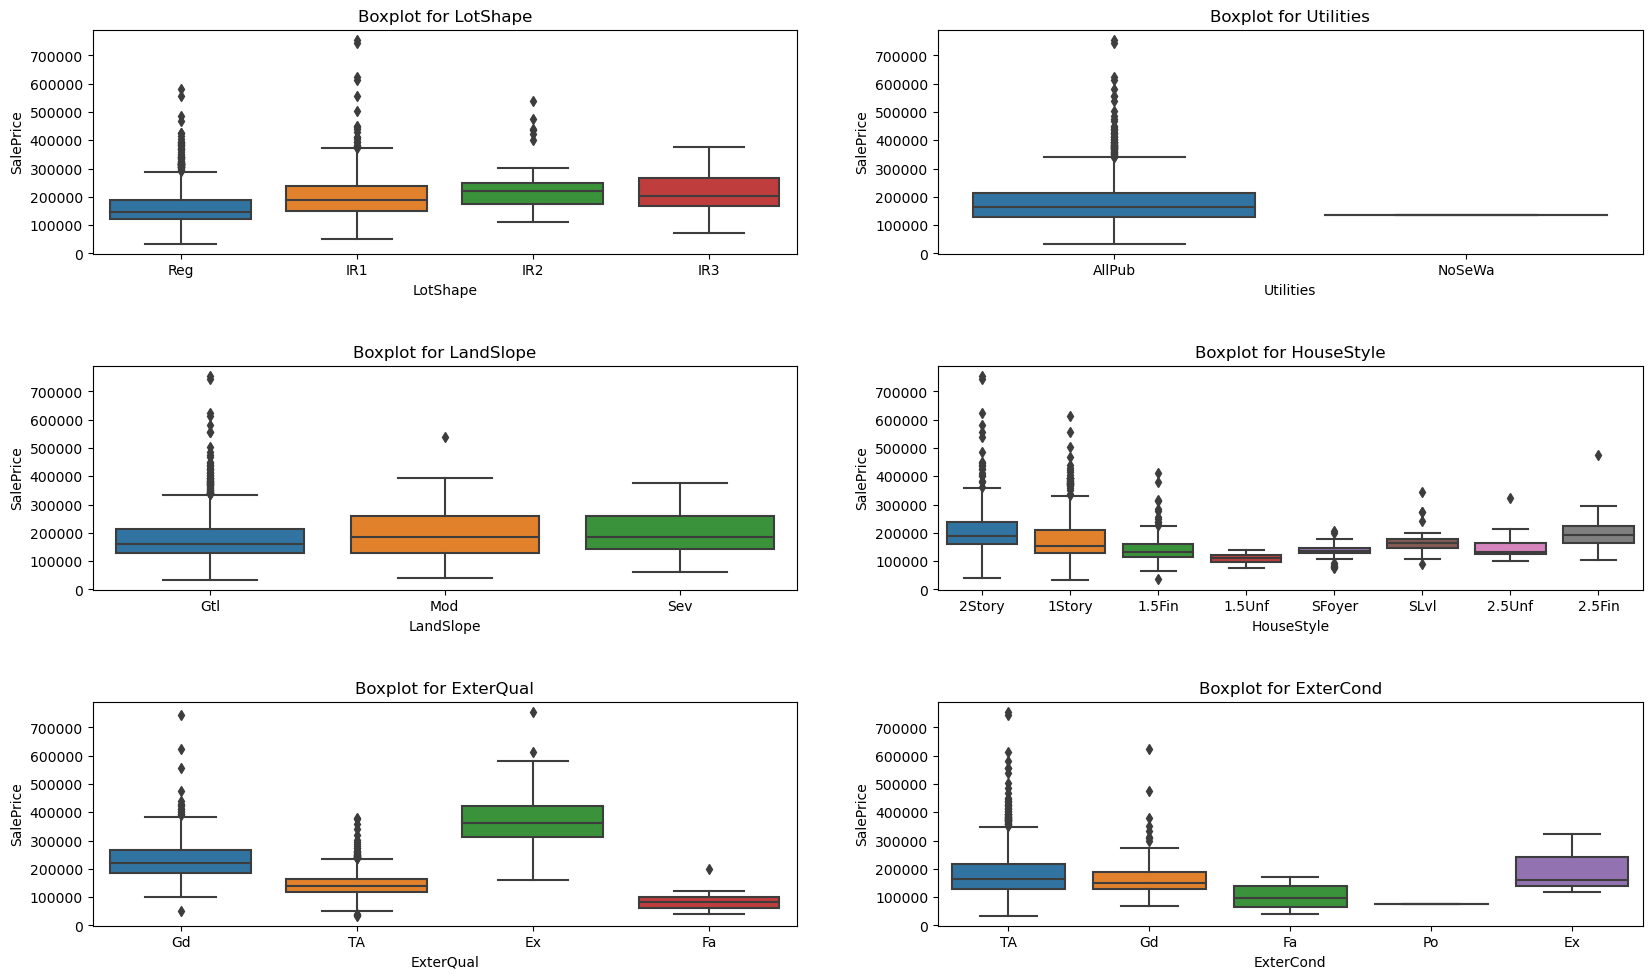

In [49]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
boxplot(ext_features)

**Observations**
- LotShape: LotShapes with a little irregularity have the highest sales. 
- Utilities: All public utilities are available to the majority of the houses in the dataset.
-  LandSlope: The lowest sales are in houses with a reverse land slope.
- HouseStyle: Two-story houses are the most sold, based on price  - ExterQual: Homes with superior exterior material quality sell for the most money.
-  ExternalCond: Homes with superior external material condition sell for the most money.

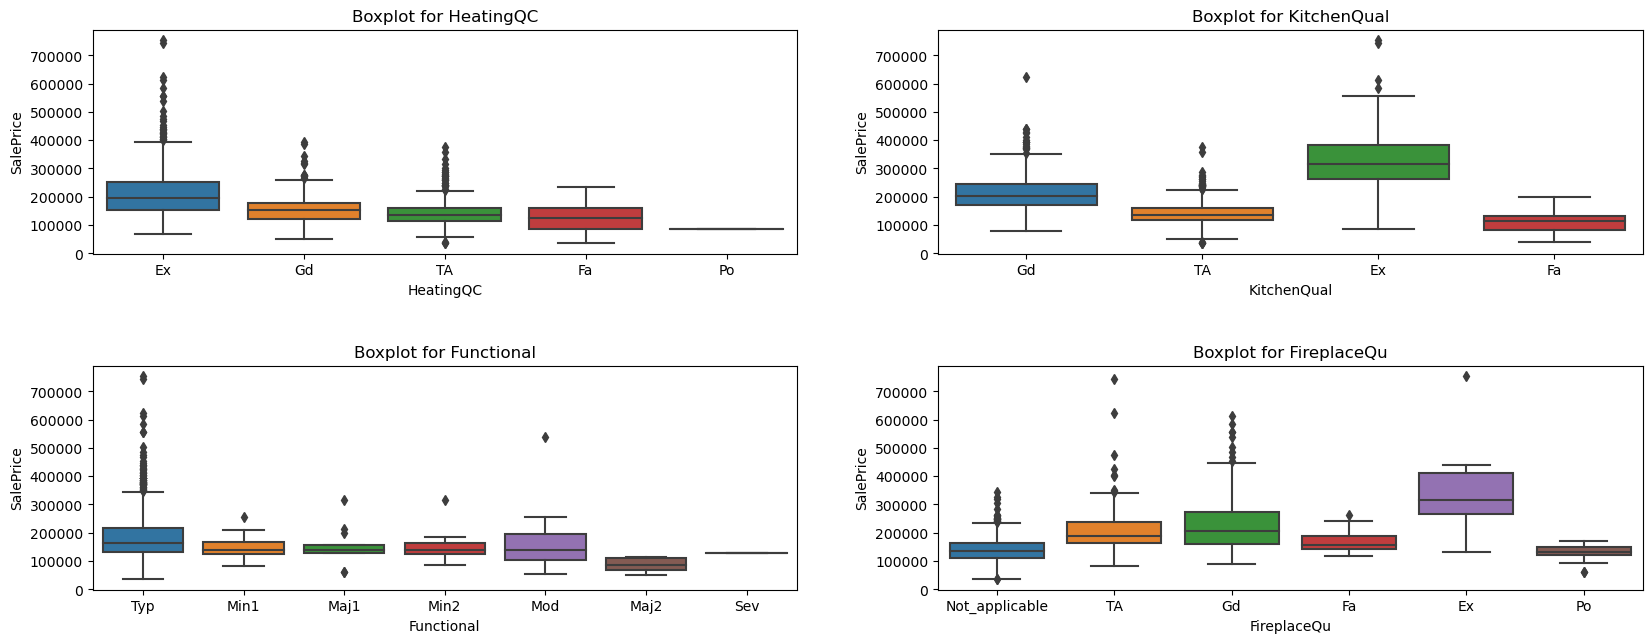

In [50]:
int_features = ['HeatingQC','KitchenQual','Functional','FireplaceQu']
boxplot(int_features)

**Observations**
- House having excellent heating quality and Kitchen quality have highest SalePrice
- House With Typical funcationally have highest SalePrice. There are very few house that are severely damaged
- SalePirce range in Largest for house with average firplace quality

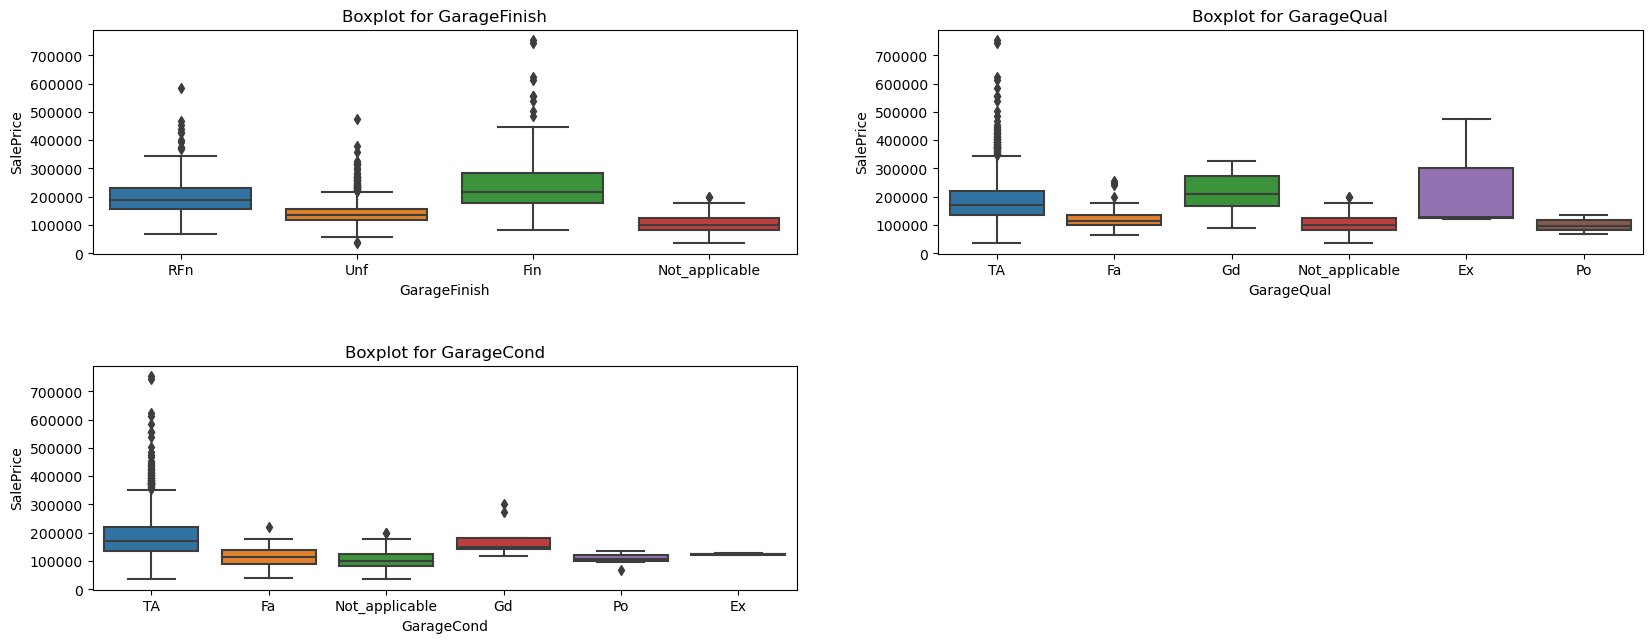

In [51]:
garage_feature = ['GarageFinish','GarageQual','GarageCond']
boxplot(garage_feature)

**Observations**
- SalePrice is highest of Garage Finished
- The Range of SalePrice is widest for Typical/Average Garage qualtiy and condition.

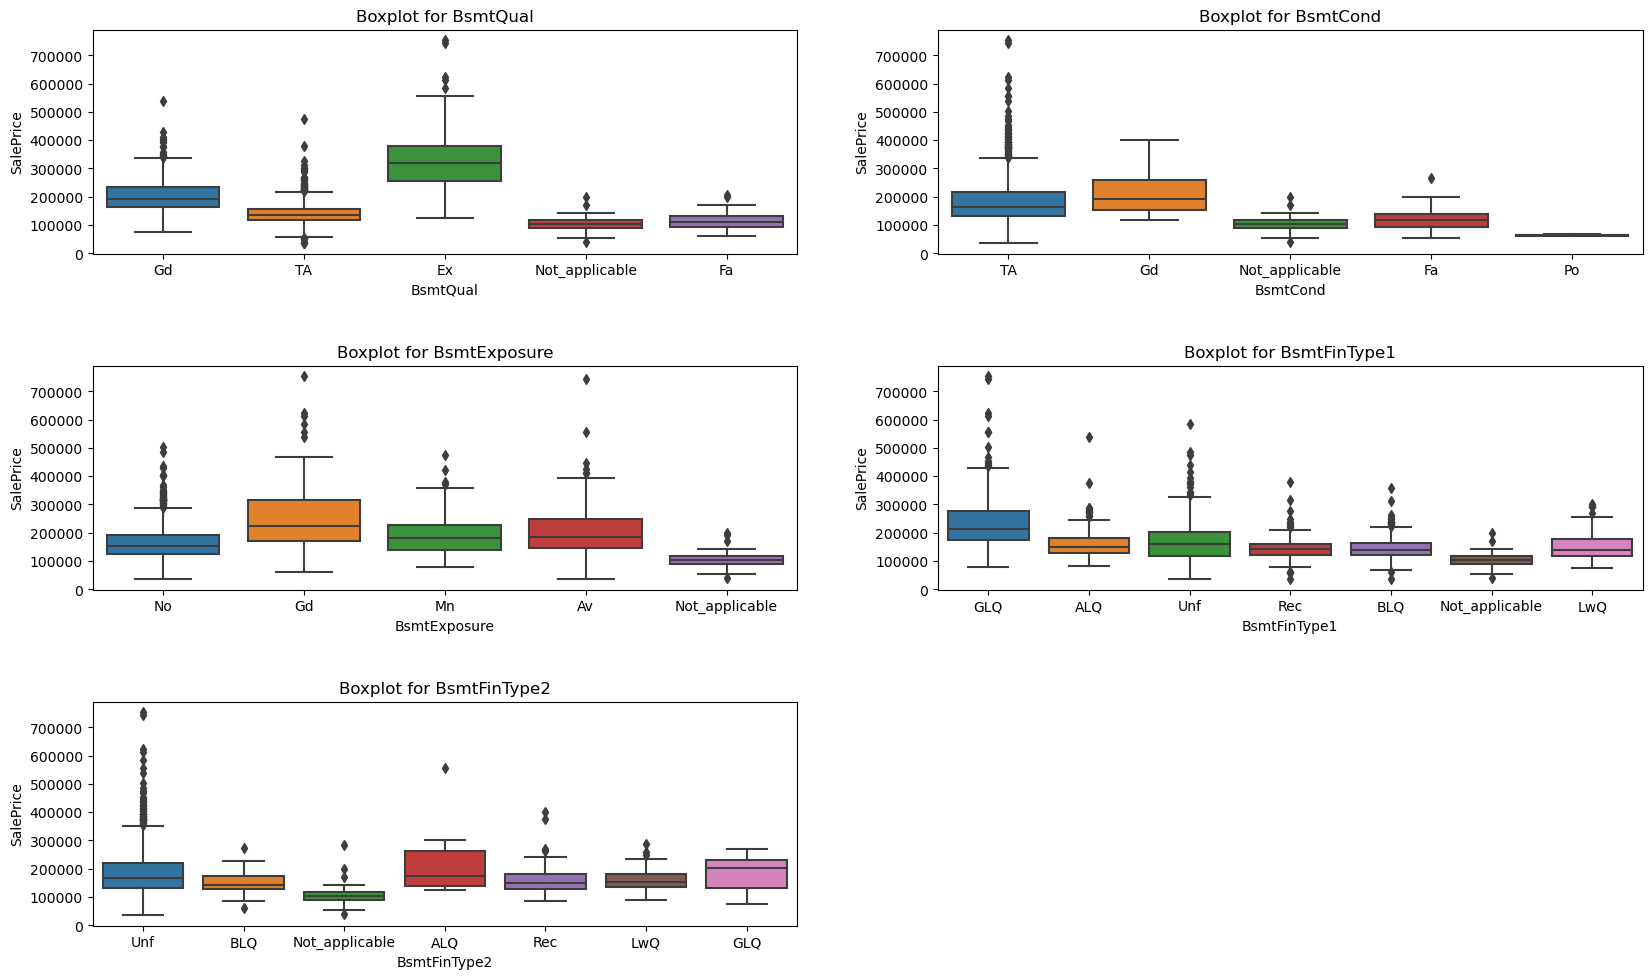

In [52]:
bassement_feature = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
boxplot(bassement_feature)

**Observations**
- Good Quality basement have highest SalePrice
- House with good living quarters (BsmtFinshType1=GLQ) have highest SalePrice

## Encoding Categorical Features

In [53]:
# LotShape into numerical values
house['LotShape']=house['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
# Utilities into numerical values
house['Utilities']=house['Utilities'].map({'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0})
# LotShape into numerical values
house['LandSlope']=house['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
# HouseStyle into numerical values
house['HouseStyle']=house['HouseStyle'].map({'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
# ExterQual into numerical values
house['ExterQual']=house['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# ExterCond into numerical values
house['ExterCond']=house['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# BsmtQual into numerical values
house['BsmtQual']=house['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# BsmtCond into numerical values
house['BsmtCond']=house['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# BsmtExposure into numerical values
house['BsmtExposure']=house['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})                                                                              
# BsmtFinType1 into numerical values
house['BsmtFinType1']=house['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
# BsmtFinType2 into numerical values
house['BsmtFinType2']=house['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
# HeatingQC into numerical values
house['HeatingQC']=house['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# CentralAir into numerical values
house['CentralAir']=house['CentralAir'].map({'N':0,'Y':1})
# KitchenQual into numerical values
house['KitchenQual']=house['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
# GarageFinish into numerical values
house['GarageFinish']=house['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
# GarageQual into numerical values
house['GarageQual']=house['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# GarageCond into numerical values
house['GarageCond']=house['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
# Functional into numerical values
house['Functional']=house['Functional'].map({'Typ':0,'Min1':1,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Fa':7,'Sev':8,'Sal':9})
# FireplaceQu into numerical values
house['FireplaceQu']=house['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [54]:
# Checkingthe Features after encoding
house[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 215.4 KB


In [55]:
unordered_feature = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','RoofStyle',
'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','Fence',
'MiscFeature','SaleType','SaleCondition']

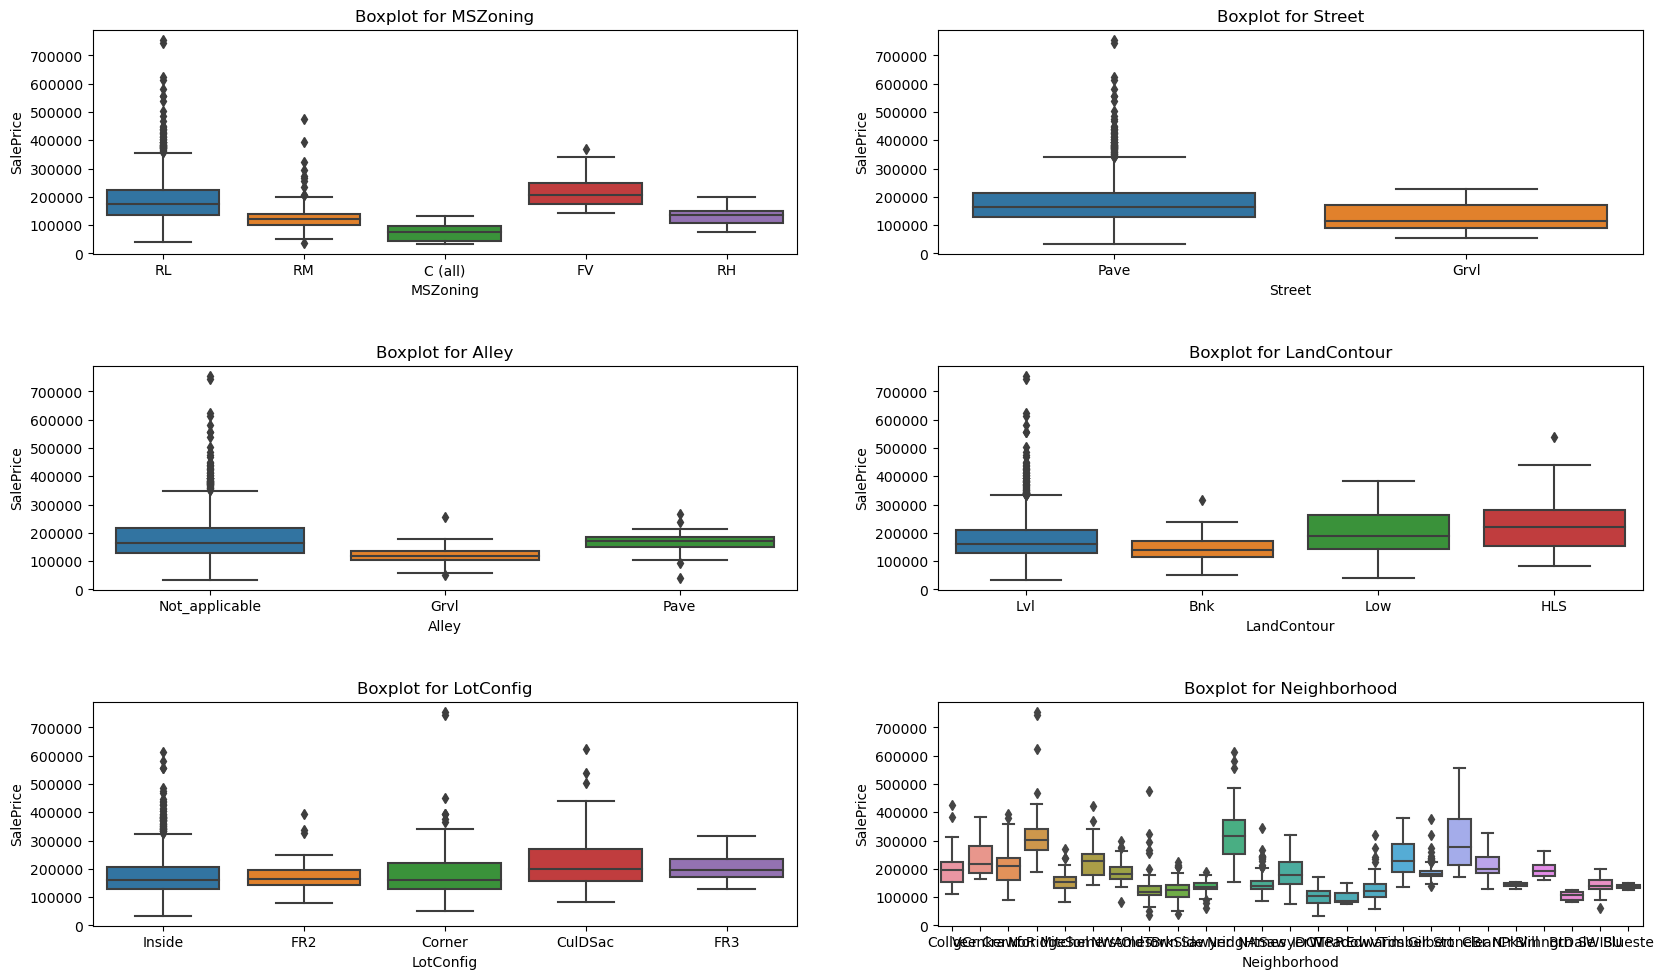

In [56]:
boxplot(['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood'])

**Observations**
- Most of the houses do not have alley
- Neighborhood has a lots of labels, using one hot coding directly would leads to high numbers of additional columns
- house classified as MSZoning = RL or Residentil Low density have the highest SalePrice 

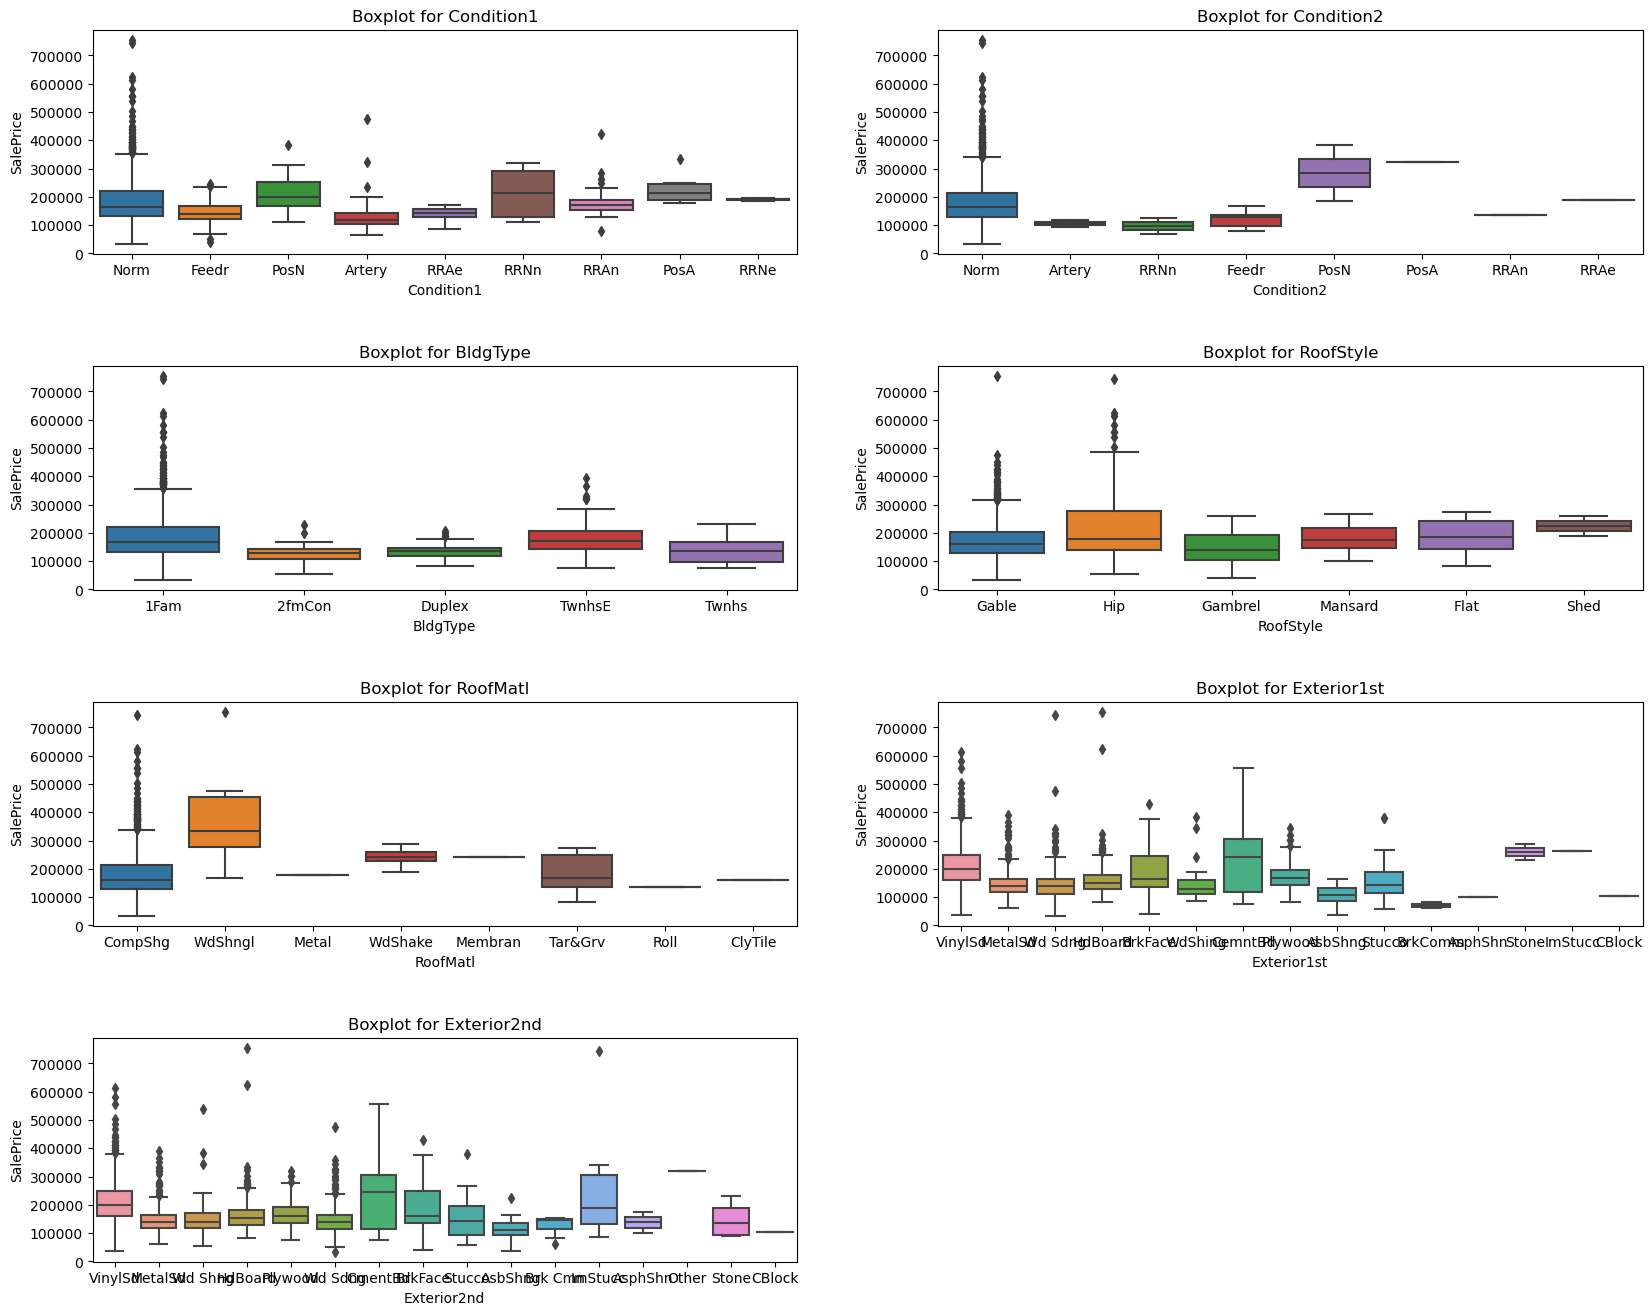

In [58]:
boxplot(['Condition1','Condition2','BldgType','RoofStyle','RoofMatl','Exterior1st','Exterior2nd'])

**Observations**

- Normal Condition ( condition1 = Norm and Condtion2 =Nrm) House are likely to have high SalePrice
- Feature like RoofMat,Exterior1st,Exterior2nd have labels with very few data this cannot contiribute in prediciting SalePrice.

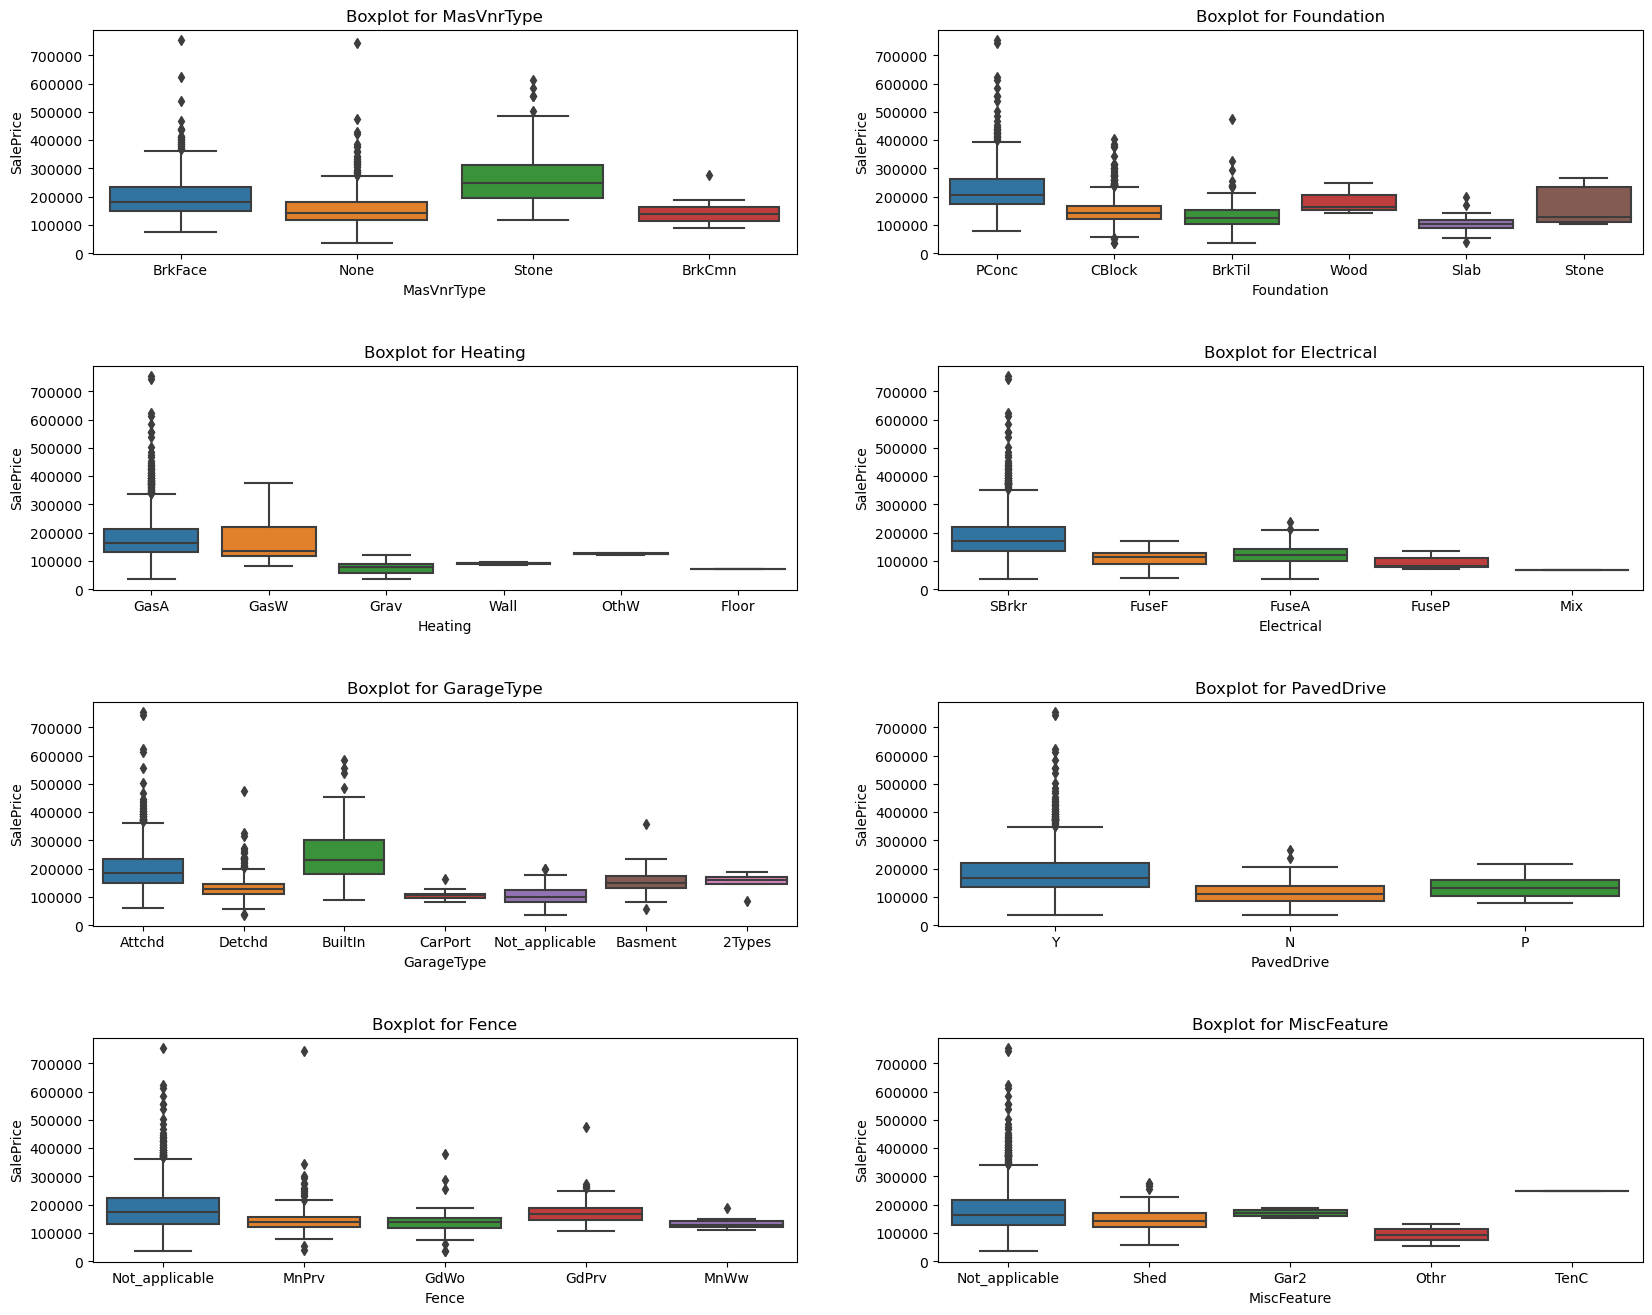

In [59]:
boxplot(['MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','Fence','MiscFeature'])

**Observations**

- Houses with foundation of poured concrete and/or Electical with Standard Circuit Break and/or Heating have the highest price
- Houses With attached and built in garage have high SalePrice

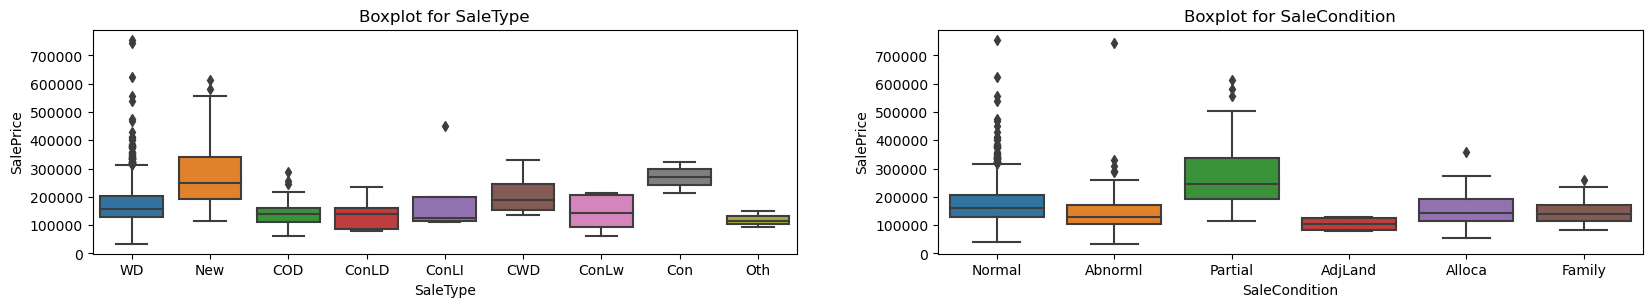

In [61]:
boxplot(['SaleType','SaleCondition'])

**Observations**
- Most of the houses taht are newly built with warranty deed have high SalePrice
- Normal Sale Conditions leads to high SalePrice

## Encoding Categorical variables

In [62]:
dummy_df = pd.get_dummies(house[unordered_feature],drop_first=True)

In [63]:
dummy_df.shape

(1451, 144)

**Observations**
- Adding 144 features to exisiting dataset will make the model complex
- From the above boxplot for some categorical features only labels is dominating over others.
- in dummy_df any label have same values like95% or more will be  dropped as those new features are highly imbalanced

In [65]:
dummies_to_drop = []
for feature in dummy_df.columns:
    if dummy_df[feature].value_counts()[0]/dummy_df.shape[0]>=0.95:
        dummies_to_drop.append(feature)
print(dummies_to_drop)
print('---------------')
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [66]:
# Dropping the highly imbalanced dummy varaiables
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [67]:
house.shape

(1451, 68)

In [68]:
# Adding the dummy variables to the original dataframe
house = pd.concat([house,dummy_df],axis=1)

# Dropping the redundant columns
house = house.drop(unordered_feature, axis=1)

## Train-test-split

In [69]:
X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,...,0,0,1,0,1,1,0,1,1,0


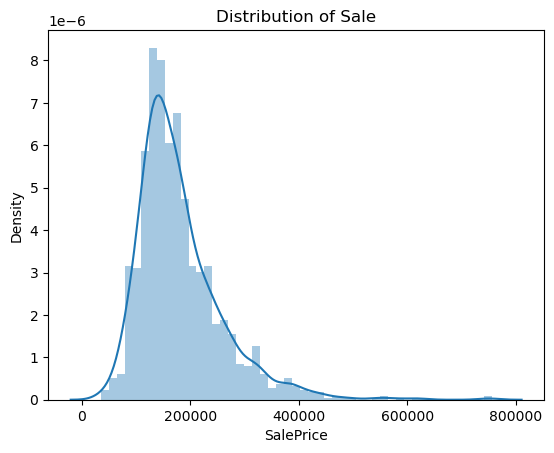

In [70]:
plt.title('Distribution of Sale')
sns.distplot(house["SalePrice"])
plt.show()

**Observation** 
- SalePrice is highly Skewed to the right, Checking the Distribution of transformed SalePrice.

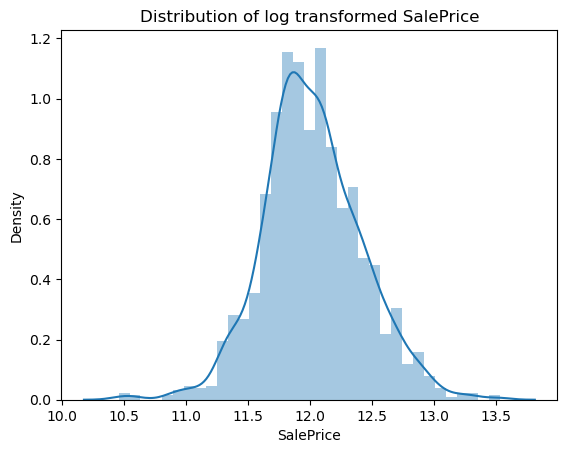

In [73]:
sns.distplot(np.log(house['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [74]:
# log transformed SalePrice is normaliy distributed, hence te transformed data will be used for model building

y = np.log(house['SalePrice'])

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 96)
(291, 96)
(1160,)
(291,)


In [77]:
X['LotFrontage'].isnull().any()

True

In [78]:
# Imputing value of LotFrontage after spliting training and testing the dataset to prevent data leakage

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [79]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [81]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

## Feature Scaling

In [82]:
X_train.values

array([[5.0000e+01, 5.4000e+01, 6.3420e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.4500e+02, 2.7500e+01, 2.5220e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 7.0000e+01, 7.9310e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [5.0000e+01, 5.0000e+01, 9.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 4.8000e+01, 1.0635e+04, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+01, 6.7000e+01, 1.0656e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [83]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [84]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [85]:
print(X_tr_scaled)
print(X_te_scaled)

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1       2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3      -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4      -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
...          ...          ...       ...       ...        ...        ...   
1155    0.128080     0.683374  0.388382 -1.386037   0.029374  -0.225421   
1156    2.389253    -2.335542 -2.214237  0.747271   0.029374  -0.225421   
1157   -0.137941    -1.065905 -0.152856  0.747271   0.029374  -0.225421   
1158   -0.936002    -1.178761  0.302352 -0.674935   0.029374  -0.225421   
1159   -0.936002    -0.106623  0.308199 -1.386037   0.029374  -0.225421   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0      -0.283496  

## Feature selection with RFE

In [86]:
# Given the number of features = n, the function prints and returns top n features selected by RFE
def top_n_features(n, X_tr_scaled, y_train):
    top_n_cols = []

    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m)  # Remove 'n' from here

    rfe = rfe.fit(X_tr_scaled, y_train)
    rfe.support_[:n] = True

    print("Top %d features: " % n)
    rfe_ranking = list(zip(X_tr_scaled.columns, rfe.support_, rfe.ranking_))

    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [87]:
# Checking top 45, 50, and 55 features
top_45 = top_n_features(45, X_tr_scaled, y_train)
top_50 = top_n_features(50, X_tr_scaled, y_train)
top_55 = top_n_features(55, X_tr_scaled, y_train)

Top 45 features: 
['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace

In [88]:
# Given the Training Data and list of features, this will provides the statisitical summary of the model
# This Will be  used to check adjusted R_squared value for top 45, 50, and 55 Features

def build_regressor(X_train, y_train, cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1, 1), X_train_ols).fit()
    print(lin_reg.summary())

In [89]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     173.7
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:51:26   Log-Likelihood:                 890.67
No. Observations:                1160   AIC:                            -1639.
Df Residuals:                    1089   BIC:                            -1280.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [90]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     166.3
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:52:11   Log-Likelihood:                 891.34
No. Observations:                1160   AIC:                            -1635.
Df Residuals:                    1086   BIC:                            -1261.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [91]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     166.3
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:53:14   Log-Likelihood:                 891.34
No. Observations:                1160   AIC:                            -1635.
Df Residuals:                    1086   BIC:                            -1261.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observation** From the above models the Ajusted R-square value of linear Regression model with top_45,top_50,and top_55 features seem to be optimum as model with 50 and 55 features have same the adjusted R-square value on the training data.

In [92]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [93]:
def build_model(X_train, X_test, y_train, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator=estimator_model,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           return_train_score=True,
                           verbose=1)
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_['alpha']
    print("Optimum alpha for %s is %f" % (model, alpha))
    final_model = model_cv.best_estimator_
    
    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
    
    # Model Evaluation
    print(model, "Regression with alpha", alpha)
    print("===========================")
    print('R2 score (train):', r2_score(y_train, y_train_pred))
    print('R2 score (test):', r2_score(y_test, y_test_pred))
    print('RMSE (train):', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test):', np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    return final_model, y_test_pred

### Ridge Regression

In [94]:
# List of alphas to tune
params = {'alpha': [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}
ridge_final_model, y_test_predicted = build_model(X_train_rfe, X_test_rfe, y_train, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 8.000000
ridge Regression with alpha 8.0
R2 score (train): 0.9178003342627445
R2 score (test): 0.871664493276473
RMSE (train): 0.11227827858804852
RMSE (test): 0.15316013370369835


**Observation:** Ridge Regression model was able to achieve R2 Score is 87% test data of variance in test data can be explained by model Root mean square error = 0.1531 on test data that means the prediction made by the model can of by 0.1531 units.

### Lasso Regression

In [95]:
params ={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0,10,100,500,10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, X_test_rfe, y_train, params, model='lasso')

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for lasso is 0.001000
lasso Regression with alpha 0.001
R2 score (train): 0.9165678478211392
R2 score (test): 0.8766142833538809
RMSE (train): 0.11311688657438038
RMSE (test): 0.15017746387061937


## Comparing model coefficient

In [96]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)']=ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_row',None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.002188,-0.000092
LotFrontage,0.009347,0.007266
LotArea,0.029383,0.030696
LotShape,-0.001284,-0.000382
Utilities,0.003666,0.002798
LandSlope,0.009532,0.010066
HouseStyle,0.001549,-0.000000
OverallQual,0.075394,0.078656
OverallCond,0.048333,0.048249
YearBuilt,-0.038212,-0.037342


In [97]:
# Converting the prediction to its orginal scale (anti log)

test_prediction = np.around(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[295203 226988 135502 115818 148340]


## Final Model

Lasso Regression product slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model

In [99]:
# 50 feature ordered by feature importance in lasso Regression
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)',ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.118748
2ndFlrSF,0.098836
OverallQual,0.078656
OverallCond,0.048249
SaleCondition_Partial,0.032206
BsmtFinSF1,0.030961
LotArea,0.030696
SaleCondition_Normal,0.027590
MSZoning_RL,0.025508
Condition1_Norm,0.023009


In [100]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)',ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'BsmtFinSF1', 'LotArea',
       'SaleCondition_Normal', 'MSZoning_RL', 'Condition1_Norm'],
      dtype='object')

**Summary**
- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 9.0 for ridge and 0.0001 for lasso model.


- Model evaluation is done with R2 score and Root Mean Square Error.


- Lasso Regression is chosen as final model for having slightly better R-square value on test data.
- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF'(x1)..and follows YearBuilt(x75)  when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 
- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 


In [102]:
len(model_coefficients)

75